In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [7]:
data_dir = Path('/bsuhome/zacharykeskinen/spicy-analysis/results/synthetic_compare/deep')

In [8]:
ds = [pd.read_csv(fp, index_col= [0, 1]) for fp in data_dir.glob('*1.csv')]

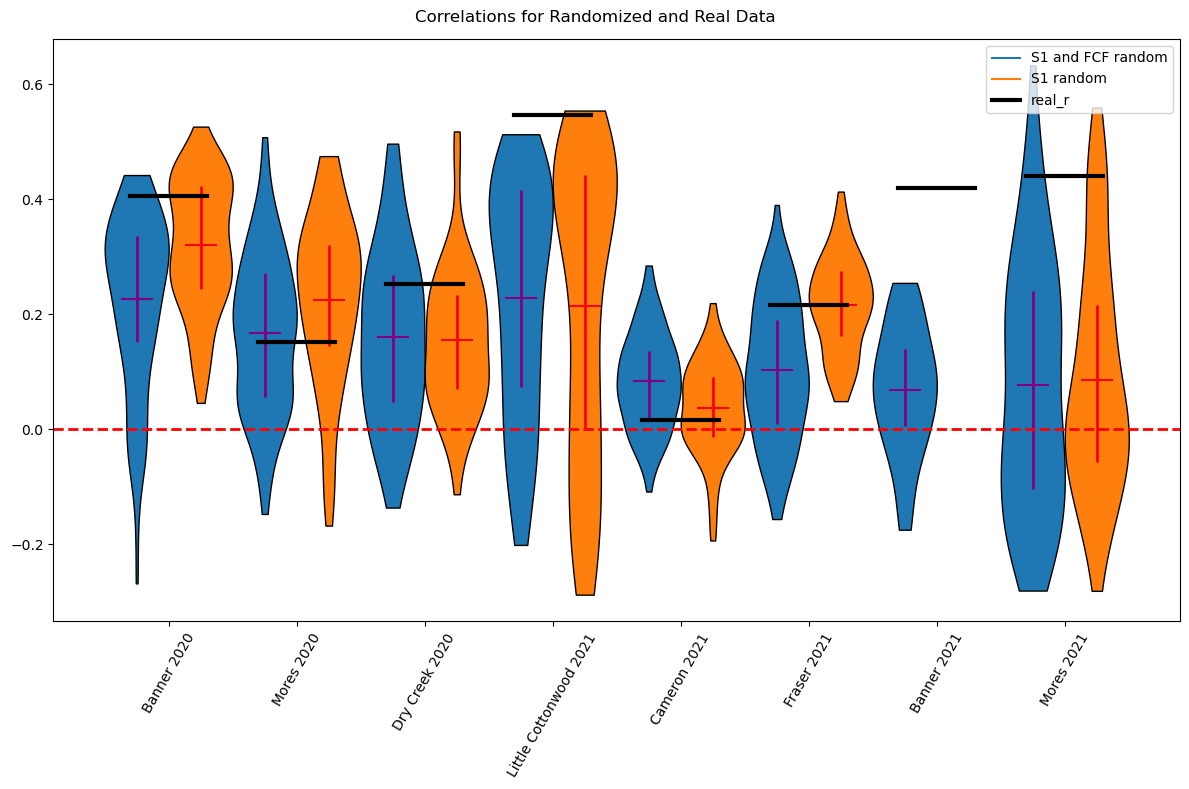

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))
labels = []
xpos= []
for i, d in enumerate(ds):
    if i == 0:
        prefix = ''
        plt.plot([0], [0], color = 'C0', label = 'S1 and FCF random')
        plt.plot([0], [0], color = 'C1', label = 'S1 random')
    else:
        prefix = '_'

    data = d.loc[('fcf_s1_random'), 'random_r']
    q1, q3 = np.percentile(data, [25, 75])
    ax.vlines(i-0.25, q1, q3, color='purple', linestyle='-', lw=2)

    parts = ax.violinplot(positions = [i-0.25], dataset = data, showextrema=False, showmeans=True)
    for pc in parts['bodies']:
        pc.set_facecolor('C0')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmeans'].set_color('purple')

    if 's1_random' in d.index:
        data = d.loc[('s1_random'), 'random_r']
        q1, q3 = np.percentile(data, [25, 75])
        ax.vlines(i+0.25, q1, q3, color='red', linestyle='-', lw=2)
        parts2 = ax.violinplot(positions = [i+0.25], dataset = data, showextrema=False, showmeans=True)
        for pc in parts2['bodies']:
            pc.set_facecolor('C1')
            pc.set_edgecolor('black')
            pc.set_alpha(1)
        parts2['cmeans'].set_color('red')

    ax.plot([i-0.3, i+ 0.3], [d.iloc[0]['optimized_r'], d.iloc[0]['optimized_r']], color = 'black', linewidth = 3, label= f'{prefix}real_r')
    
    xpos.append(i)
    labels.append(d.index[0][0])
ax.legend()
ax.axhline(0, linestyle = 'dashed', lw = 2, color = 'red')
ax.set_xticks(xpos)
ax.set_xticklabels(labels, rotation=60)
plt.suptitle('Correlations for Randomized and Real Data')
plt.tight_layout()

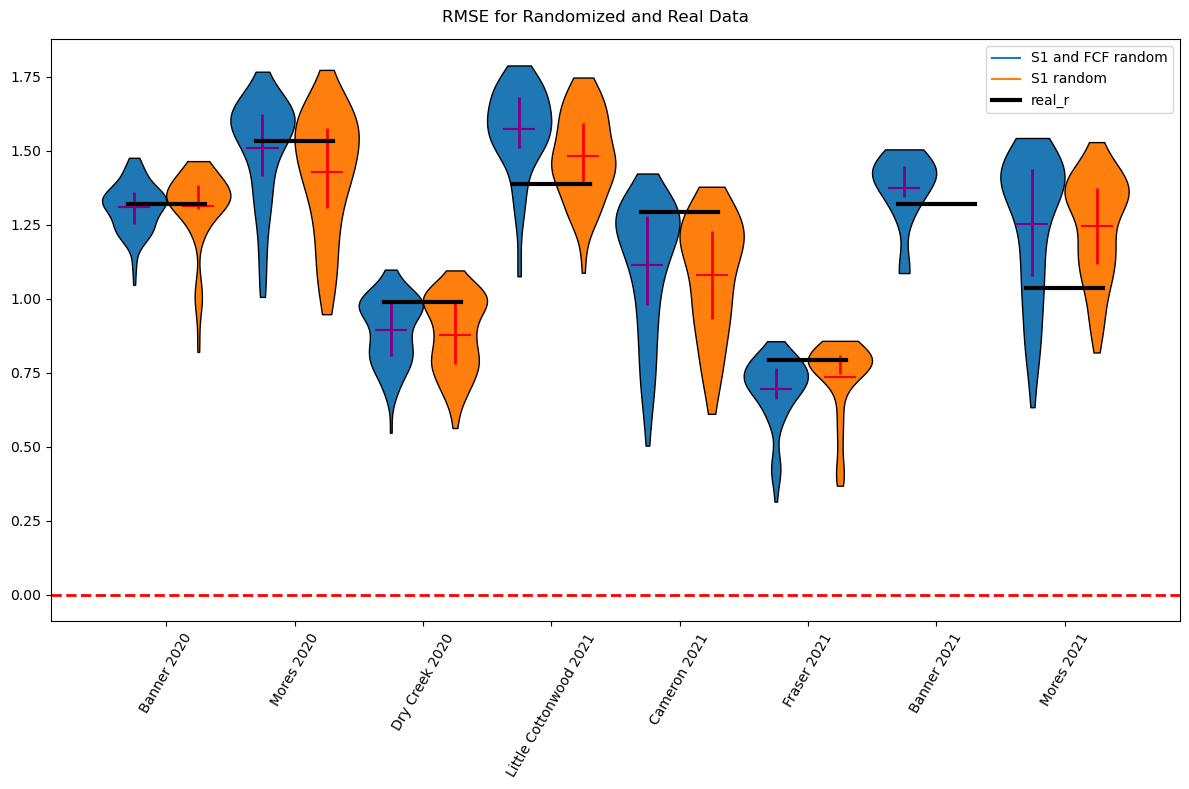

In [112]:
fig, ax = plt.subplots(figsize = (12, 8))
labels = []
xpos= []
for i, d in enumerate(ds):
    if i == 0:
        prefix = ''
        plt.plot([0], [0], color = 'C0', label = 'S1 and FCF random')
        plt.plot([0], [0], color = 'C1', label = 'S1 random')
    else:
        prefix = '_'

    data = d.loc[('fcf_s1_random'), 'random_rmse']
    q1, q3 = np.percentile(data, [25, 75])
    ax.vlines(i-0.25, q1, q3, color='purple', linestyle='-', lw=2)

    parts = ax.violinplot(positions = [i-0.25], dataset = data, showextrema=False, showmeans=True)
    for pc in parts['bodies']:
        pc.set_facecolor('C0')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmeans'].set_color('purple')

    if 's1_random' in d.index:
        data = d.loc[('s1_random'), 'random_rmse']
        q1, q3 = np.percentile(data, [25, 75])
        ax.vlines(i+0.25, q1, q3, color='red', linestyle='-', lw=2)
        parts2 = ax.violinplot(positions = [i+0.25], dataset = data, showextrema=False, showmeans=True)
        for pc in parts2['bodies']:
            pc.set_facecolor('C1')
            pc.set_edgecolor('black')
            pc.set_alpha(1)
        parts2['cmeans'].set_color('red')

    ax.plot([i-0.3, i+ 0.3], [d.iloc[0]['optimized_rmse'], d.iloc[0]['optimized_rmse']], color = 'black', linewidth = 3, label= f'{prefix}real_r')
    
    xpos.append(i)
    labels.append(d.index[0][0])
ax.legend()
ax.axhline(0, linestyle = 'dashed', lw = 2, color = 'red')
ax.set_xticks(xpos)
ax.set_xticklabels(labels, rotation=60)
plt.suptitle('RMSE for Randomized and Real Data')
plt.tight_layout()